<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L02_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression Practice**


## **Logistic Regression Practice with Pytorch**

In [50]:
import torch

# 학습 데이터 생성
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

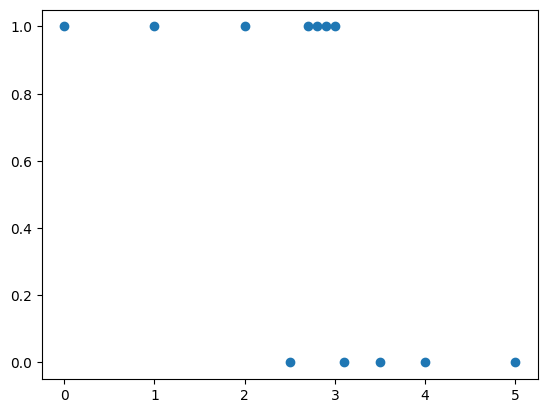

In [53]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.show()

In [59]:
bce = torch.nn.BCELoss()

w = torch.randn(1,1)
b = torch.randn(1,1)
lr = 1.0

for epoch in range(3001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)
    # cost = torch.mean(- y_train * torch.log(h) - (1 - y_train) * torch.log(1-h))
    cost = bce(h, y_train)
    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(epoch, cost.item(), w.item(), b.item())

0 2.7967586517333984 0.05354189872741699 0.6453951597213745
100 0.41863682866096497 -1.4763917922973633 4.484184265136719
200 0.39823606610298157 -1.9125269651412964 5.8165693283081055
300 0.39060333371162415 -2.183804988861084 6.638197898864746
400 0.3868948221206665 -2.3742215633392334 7.212350845336914
500 0.38485899567604065 -2.5158538818359375 7.6382341384887695
600 0.3836592137813568 -2.6248533725738525 7.965384006500244
700 0.3829188048839569 -2.71063232421875 8.222496032714844
800 0.38244667649269104 -2.779198169708252 8.427809715270996
900 0.38213884830474854 -2.8346354961395264 8.5936861038208
1000 0.3819343149662018 -2.8798437118530273 8.728875160217285
1100 0.38179662823677063 -2.9169538021087646 8.839795112609863
1200 0.38170313835144043 -2.947580575942993 8.931302070617676
1300 0.381638765335083 -2.972957134246826 9.007100105285645
1400 0.3815944194793701 -2.994055986404419 9.070104598999023
1500 0.3815635144710541 -3.0116448402404785 9.1226167678833
1600 0.38154196739196

In [63]:
# 예측하기
x_test = torch.FloatTensor([[4.5],[1.1]])

test_result = torch.sigmoid(x_test @ w + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


## **Visualization with Matplotlib**

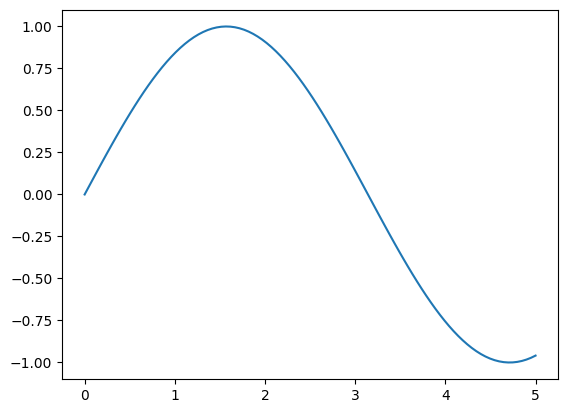

In [67]:
import math
import matplotlib.pyplot as plt

X = [x.item() for x in torch.linspace(0,5,100)]
Y = []
for x in X:
    Y.append(math.sin(x))

plt.plot(X,Y)

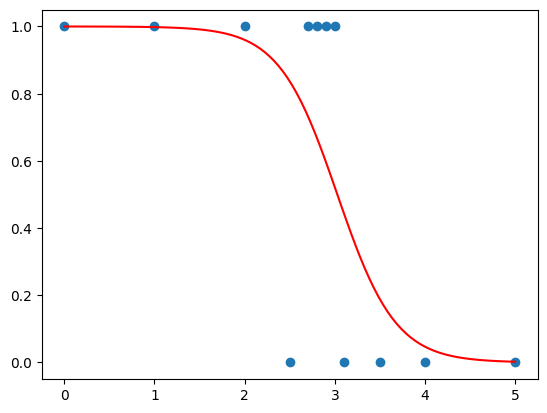

In [71]:
import matplotlib.pyplot as plt

X = torch.linspace(0,5,100).unsqueeze(1)

Y = torch.sigmoid(X @ w + b)

plt.scatter(x_train, y_train)
plt.plot(X,Y,c='red')
plt.show()

## **Using various optimizers**

In [72]:
w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1,1, requires_grad=True)

optimizer = torch.optim.SGD([w,b], lr=1.0)

for epoch in range(3001):

    h = torch.sigmoid(x_train @ w + b)
    cost = torch.mean(- y_train * torch.log(h) - (1 - y_train) * torch.log(1-h))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item(), w.item(), b.item())

0 2.0896856784820557 -0.31539618968963623 0.3715325593948364
100 0.41918301582336426 -1.4676392078399658 4.4572553634643555
200 0.39840492606163025 -1.9075926542282104 5.801579475402832
300 0.39067912101745605 -2.1804802417755127 6.628155708312988
400 0.38693463802337646 -2.371802806854248 7.205069541931152
500 0.3848818242549896 -2.5140185356140137 7.632721424102783
600 0.3836729824542999 -2.6234233379364014 7.961094856262207
700 0.38292738795280457 -2.7094976902008057 8.219096183776855
800 0.3824523985385895 -2.7782859802246094 8.425079345703125
900 0.3821425437927246 -2.8338944911956787 8.591469764709473
1000 0.3819367587566376 -2.8792359828948975 8.727058410644531
1100 0.3817983865737915 -2.916455030441284 8.83830451965332
1200 0.3817042410373688 -2.9471662044525146 8.930065155029297
1300 0.3816395699977875 -2.972613573074341 9.006073951721191
1400 0.3815948963165283 -2.993769884109497 9.069250106811523
1500 0.3815639317035675 -3.0114071369171143 9.121907234191895
1600 0.3815422356

In [73]:
w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1,1, requires_grad=True)

optimizer = torch.optim.Adam([w,b], lr=1.0)

for epoch in range(3001):

    h = torch.sigmoid(x_train @ w + b)
    cost = torch.mean(- y_train * torch.log(h) - (1 - y_train) * torch.log(1-h))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item(), w.item(), b.item())

0 1.13499915599823 0.2778332233428955 0.8050602674484253
100 0.3818106949329376 -2.918867588043213 8.844947814941406
200 0.3814918100833893 -3.0933804512023926 9.366583824157715
300 0.3814908564090729 -3.1037538051605225 9.397459030151367
400 0.3814907371997833 -3.103853702545166 9.39775562286377
500 0.3814907371997833 -3.103853702545166 9.39775562286377
600 0.3814908266067505 -3.1038527488708496 9.397753715515137
700 0.3814907371997833 -3.1038529872894287 9.397753715515137
800 0.3814907371997833 -3.1038529872894287 9.397753715515137
900 0.3814907371997833 -3.1038529872894287 9.397753715515137
1000 0.3814908266067505 -3.103853225708008 9.397753715515137
1100 0.3814907371997833 -3.1038522720336914 9.397750854492188
1200 0.38149070739746094 -3.1038525104522705 9.397751808166504
1300 0.3814907968044281 -3.1038529872894287 9.397753715515137
1400 0.3814907968044281 -3.1038525104522705 9.397753715515137
1500 0.3814907968044281 -3.103851318359375 9.397753715515137
1600 0.3814907968044281 -3.1

In [74]:
w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1,1, requires_grad=True)

optimizer = torch.optim.RMSprop([w,b], lr=1.0)

for epoch in range(3001):

    h = torch.sigmoid(x_train @ w + b)
    cost = torch.mean(- y_train * torch.log(h) - (1 - y_train) * torch.log(1-h))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item(), w.item(), b.item())

0 1.137118935585022 9.20087718963623 9.967850685119629
100 nan nan nan
200 nan nan nan
300 nan nan nan
400 nan nan nan
500 nan nan nan
600 nan nan nan
700 nan nan nan
800 nan nan nan
900 nan nan nan
1000 nan nan nan
1100 nan nan nan
1200 nan nan nan
1300 nan nan nan
1400 nan nan nan
1500 nan nan nan
1600 nan nan nan
1700 nan nan nan
1800 nan nan nan
1900 nan nan nan
2000 nan nan nan
2100 nan nan nan
2200 nan nan nan
2300 nan nan nan
2400 nan nan nan
2500 nan nan nan
2600 nan nan nan
2700 nan nan nan
2800 nan nan nan
2900 nan nan nan
3000 nan nan nan


In [75]:
w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1,1, requires_grad=True)

optimizer = torch.optim.RMSprop([w,b], lr=0.1)

for epoch in range(3001):

    h = torch.sigmoid(x_train @ w + b)
    cost = torch.mean(- y_train * torch.log(h) - (1 - y_train) * torch.log(1-h))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item(), w.item(), b.item())

0 1.9150208234786987 -0.5185533165931702 0.9865930080413818
100 0.40078219771385193 -1.8438739776611328 5.615209579467773
200 0.3859042823314667 -2.4387950897216797 7.413451194763184
300 0.38528716564178467 -2.684659957885742 8.37995433807373
400 0.3850831687450409 -2.850414752960205 8.883992195129395
500 0.38555923104286194 -2.9431352615356445 9.166520118713379
600 0.3839394152164459 -3.0094351768493652 9.309308052062988
700 0.38370129466056824 -3.040290594100952 9.395870208740234
800 0.38397324085235596 -3.0541372299194336 9.449236869812012
900 0.38403406739234924 -3.0634288787841797 9.478630065917969
1000 0.3839693069458008 -3.0696334838867188 9.494474411010742
1100 0.383961945772171 -3.0728225708007812 9.503864288330078
1200 0.38397732377052307 -3.07448410987854 9.509437561035156
1300 0.3839784562587738 -3.0755279064178467 9.512554168701172
1400 0.38397547602653503 -3.076158285140991 9.514311790466309
1500 0.3839757442474365 -3.076495885848999 9.515334129333496
1600 0.3839765489101

## **Logistic Regression with Scikit-learn**

In [82]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]# 입력 shape이 PyTorch에서와 다름에 주의!

model = LogisticRegression(penalty=None) # penalty (or regularization)은 추후 추천시스템설계에서 설명
model.fit(x_train, y_train)

# w와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)

[[-3.10428163]] [9.39919938]


In [84]:
# 예측하기
x_test = [[4.5],[1.1]]

res = model.predict(x_test)
print(res)

[0 1]
